# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd # импорт нужных бибилиотек

# откроем файл с указанием разделителя '\t'
try:
    data = pd.read_csv('/Users/a1234/Documents/vscode-projects/projects_yandex/sprint_3/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') # для ревью

# общая информация о количестве/типе данных/названии Series и их ненулевых значений
data.info()
# визуальное знакомство
data.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
# переименуем столбец cityCenters_nearest согласно pep8
data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}, inplace=True)

array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'city_centers_nearest'}>],
       [<Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>],
       [<Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

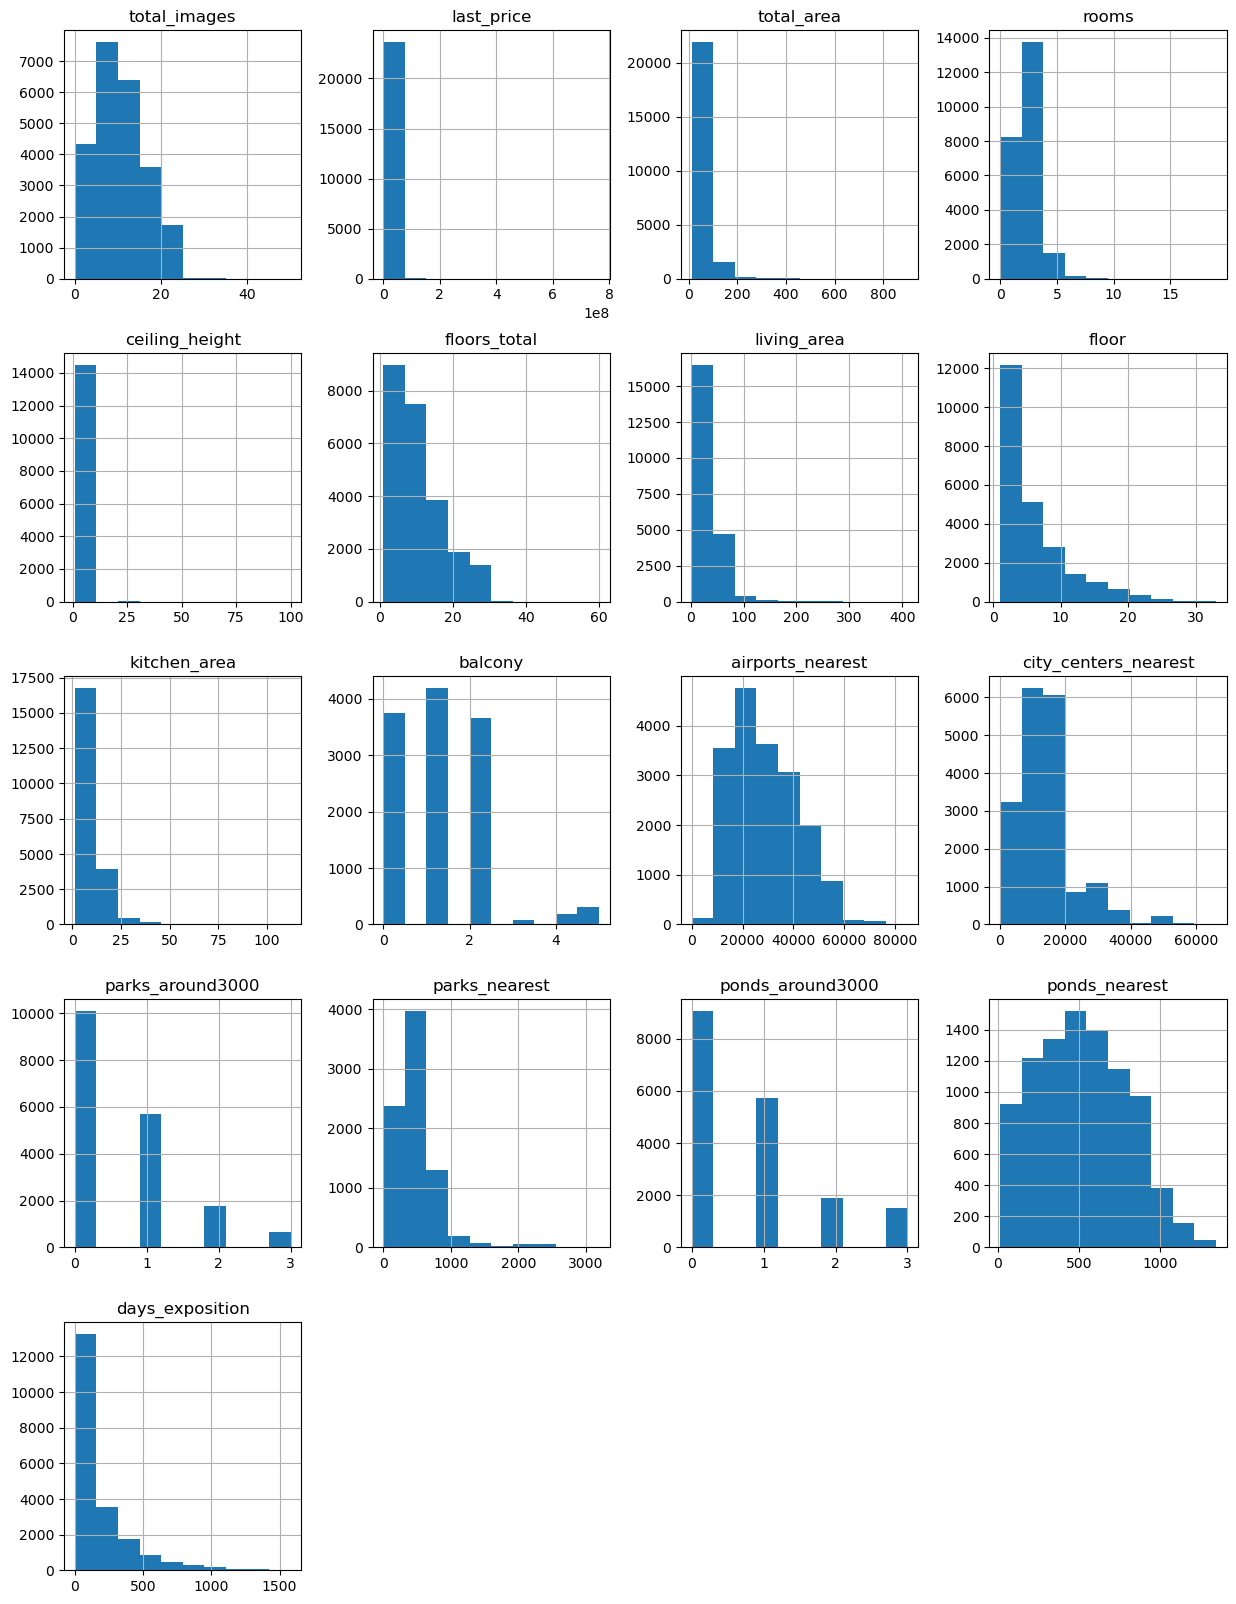

In [3]:
# гистограмма для каждого столбца
data.hist(figsize=(15, 20))

**Данные представленны преимещественно в колличественном виде.\
studio, is_apartment и open_plan - булевы категории.**
    
По гистограммам наблюдается преимущественно Пуассоново распределение.\
*total_area, ceiling_height, living_area* содержат аномально большие значения.

## Предобработка данных

### Работа с пропусками и типами данных

In [4]:
# сумма пустых значений
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Возможные решения проблем с пропусками:**

- [x] *ceiling_height*        - высоту потолка можно заменить медианным значением

- [x] *floors_total*          - максимальный этаж строения изменим на медианное значение

- [x] *living_area*           - при отсутствии балконов площадь окрытой планировки равняется общей площади

- [x] *is_apartment*          - булев тип данных, пропуски, вероятно, это False

- [x] *kitchen_area*          - при открытой планировке/студии квадратура кухни - ноль

- [x] *balcony*               - ТЗ подтверждает: сменить пропуски на 0

- [x] *locality_name*         - привязка к картографическим данным требует особенной точности

- [ ] *airports_nearest*      - привязка к картографическим данным требует особенной точности

- [ ] *city_centers_nearest*   - привязка к картографическим данным требует особенной точности

- [ ] *parks_around3000*      - привязка к картографическим данным требует особенной точности

- [ ] *parks_nearest*         - привязка к картографическим данным требует особенной точности

- [ ] *ponds_around3000*      - привязка к картографическим данным требует особенной точности

- [ ] *ponds_nearest*         - привязка к картографическим данным требует особенной точности

- [ ] *days_exposition*       - думаю, эти объявления не сняты с публикации, нужно проверить

In [5]:
# ceiling_height заполним медианными значениями
data['ceiling_height'] = data['ceiling_height'].fillna(
                            data['ceiling_height'].median())

print('Количество пустых значений после:',
      data['ceiling_height'].isna().sum())

Количество пустых значений после: 0


In [6]:
# пропуски floors_total заполним медианными значениями
data['floors_total'] = data['floors_total'].fillna(
                        data['floors_total'].median()).astype(int)

print('Количество пустых значений после:',
      data['floors_total'].isna().sum())

Количество пустых значений после: 0


In [7]:
# living_area при открытой планировке или студии и отсутствии балконов
data.loc[(
        data['living_area'].isna())
        & (data['studio'] == True)
        | (data['open_plan'] == True),
    'living_area'] = data['total_area']

print('Количество пустых значений после:',
      data['living_area'].isna().sum())

Количество пустых значений после: 1888


In [8]:
# is_apartment - содержит булев тип данных, сменим NaN на Flase
data['is_apartment'] = data['is_apartment'].apply(
                        lambda x: x if pd.notna(x) else False)

print('Количество пустых значений после:',
      data['is_apartment'].isna().sum())

def maks_privet(x, y):
    for i in x:
        for i in y:
            ret

Количество пустых значений после: 0


In [9]:
# kitchen_area при свободной планировке или студии присвоим 0 квадратов
data.loc[(
        data['kitchen_area'].isna())
        & (data['studio'] == True)
        | (data['open_plan'] == True),
    'kitchen_area'] = 0

print('Количество пустых значений после:',
      data['kitchen_area'].isna().sum())

Количество пустых значений после: 2062


In [10]:
# balcony присвоим 0 пустым значениям, скорее всего эти объекты без балкона
data['balcony'] = data['balcony'].fillna(0).astype(int)

print('Количество пустых значений после:',
      data['balcony'].isna().sum())

Количество пустых значений после: 0


In [11]:
# locality_name найдем по километрам в city_center_nearest: решение через создание словаря c индексами

# создание словаря с индексами. по времени - самый оптимальный алгоритм
dictionary = data.dropna().set_index('city_centers_nearest')['locality_name'].to_dict()

data['locality_name'] = data['locality_name'].fillna(
                            data['city_centers_nearest'].map(dictionary))

print('Количество пустых значений после:',
      data['locality_name'].isna().sum())

Количество пустых значений после: 43


In [12]:
data['days_exposition'] = data['days_exposition'].fillna(
                            data['days_exposition'].median()).astype(int)

print('Количество пустых значений после:',
      data['days_exposition'].isna().sum())

Количество пустых значений после: 0


In [13]:
data['last_price'] = data['last_price'].astype(int)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

# проверка результата
data.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                  int64
dtype: object

In [14]:
# устраним явные бубликаты
data = data.drop_duplicates()

**Изменены количественные типы данных, не троноты картографические данные,\
требующие особой точности, а также квадратура и высота потолка.**

**Пропуски, в столбцах с добавленными пользователем данными отсутствуют значения,\
вероятно, по нескольким причинам: с булевым типов данных, скорее всего пропуск\
отзначает False. Либо пользовател сталкивался с затруднениями в указании каких-либо\
пространственных данных, например: высота потолка, или размер кухни.**

**Появившиеся пропуски в картографических данных объяснить сложнее. Возможно, что-то "отвалилось".**

### Устранение неявных дубликатов

In [15]:
# заменим Ё на Е в каждом вхождении
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

# создание словаря для замены значений
to_replace = {
     r'(\b)поселок городского типа(\b)':r'\1городской поселок\2',
     r'(\b)поселок при железнодорожной станции(\b)':r'\1поселок станции\2',
     r'(\b)садоводческое некоммерческое товарищество(\b)':r'\1садовое товарищество\2',
     r'(\b)коттеджный поселок(\b)':r'\1поселок\2'
}

data['locality_name'] = data['locality_name'].replace(to_replace, regex=True)

### Работа с выбросами

In [16]:
# вероятное сервиснное ограничение по колличеству изображений 20
print(data['total_images'].describe())
data['total_images'] = data['total_images'].apply(lambda x: data['total_images'].median() if x > 20 else x)

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64


In [17]:
# ceiling_height ограничен строительными нормами снизу 2.4 метра
# 10 метров - вероятный предел даже для элитного жилья

print(data['ceiling_height'].describe())
data['ceiling_height'] = data['ceiling_height'].apply(lambda x: x/10 if 24 <= x <= 100 else x)
data['ceiling_height'] = data['ceiling_height'].apply(lambda x: data['ceiling_height'].median() if x > 10 or x < 2.4 else x)

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


In [18]:
# (для ревьюера) не очень понял, как это работает
for series in data.columns:
    try:
        data = data[(data[series].isna()) | \
                                    ((data[series] <= data[series].quantile(0.995)) & \
                                    (data[series] >= data[series].quantile(0.005)))]
    except: print(series, "non-numeric values")

is_apartment non-numeric values
studio non-numeric values
open_plan non-numeric values
locality_name non-numeric values


***Таким образом удалось спасти максимальное количество данных,\
с минимальным отрицательным влиянием на выводы.***

## Посчитайте и добавьте в таблицу новые столбцы

In [19]:
# найдем стоимость квадрата
data['cost_meter'] = (data['last_price']/data['total_area']).round().astype(int)

In [20]:
# определим день недели
data['weekday'] = data['first_day_exposition'].dt.dayofweek

In [21]:
# определим месяц публикации объявления
data['month'] = data['first_day_exposition'].dt.month

In [22]:
# год публикации
data['year'] = data['first_day_exposition'].dt.year

In [23]:
# функция по поиску первого и последнего этажей
def find_floor_position(row):
    try:
        if row['floor'] != 1 and row['floor'] == row['floors_total']:
            return 'последний'
        elif row['floor'] == 1 and row['floors_total'] > 1:
            return 'первый'
        else:
            return 'другой'
    except:
        return 'нет данных'
        
data['floor_position'] = data.apply(find_floor_position, axis=1)

In [24]:
# расстояние до центра в км, из-за пропусков Series останется float
data['city_centers_km'] = (data['city_centers_nearest']/1000).round()

## Проведите исследовательский анализ данных

### Предварительный анализ

In [25]:
data.describe(include='all', datetime_is_numeric=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_meter,weekday,month,year,floor_position,city_centers_km
count,21726.000000,2.172600e+04,21726.000000,21726,21726.000000,21726.000000,21726.000000,19999.000000,21726.000000,21726,...,7056.000000,16528.000000,8035.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726,16527.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,другой,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21690,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16137,NaN
mean,9.811286,5.669077e+06,56.861429,2017-11-19 12:58:35.492957696,2.007410,2.680972,10.767882,32.469415,5.888889,NaN,...,483.314626,0.725617,530.281892,158.974593,96766.225214,2.572862,6.381294,2017.397680,NaN,14.140860
min,0.000000,8.000000e+05,23.500000,2014-12-22 00:00:00,0.000000,2.500000,2.000000,11.600000,1.000000,NaN,...,17.000000,0.000000,31.000000,3.000000,10507.000000,0.000000,1.000000,2014.000000,NaN,1.000000
25%,6.000000,3.400000e+06,40.000000,2017-05-24 00:00:00,1.000000,2.600000,5.000000,18.600000,2.000000,NaN,...,293.000000,0.000000,317.000000,45.000000,76190.000000,1.000000,3.000000,2017.000000,NaN,10.000000
50%,9.000000,4.590000e+06,51.200000,2017-12-15 00:00:00,2.000000,2.650000,9.000000,30.000000,4.000000,NaN,...,455.000000,0.000000,519.000000,95.000000,94375.000000,3.000000,6.000000,2017.000000,NaN,13.000000
75%,14.000000,6.500000e+06,67.500000,2018-08-27 00:00:00,3.000000,2.700000,16.000000,41.600000,8.000000,NaN,...,611.250000,1.000000,739.000000,191.000000,112818.500000,4.000000,10.000000,2018.000000,NaN,16.000000
max,20.000000,5.400000e+07,214.000000,2019-04-29 00:00:00,5.000000,3.750000,27.000000,102.000000,24.000000,NaN,...,2295.000000,3.000000,1219.000000,1112.000000,848485.000000,6.000000,12.000000,2019.000000,NaN,51.000000


array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'first_day_exposition'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>,
        <Axes: title={'center': 'kitchen_area'}>],
       [<Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'city_centers_nearest'}>,
        <Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>],
       [<Axes: title={'center': 'ponds_around3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>,
        <Axes: title={'center': 'days_exposition'}>,
        <Axes: title={'center': 'cost_meter'}>,
        <Axes: title={'center': 'weekd

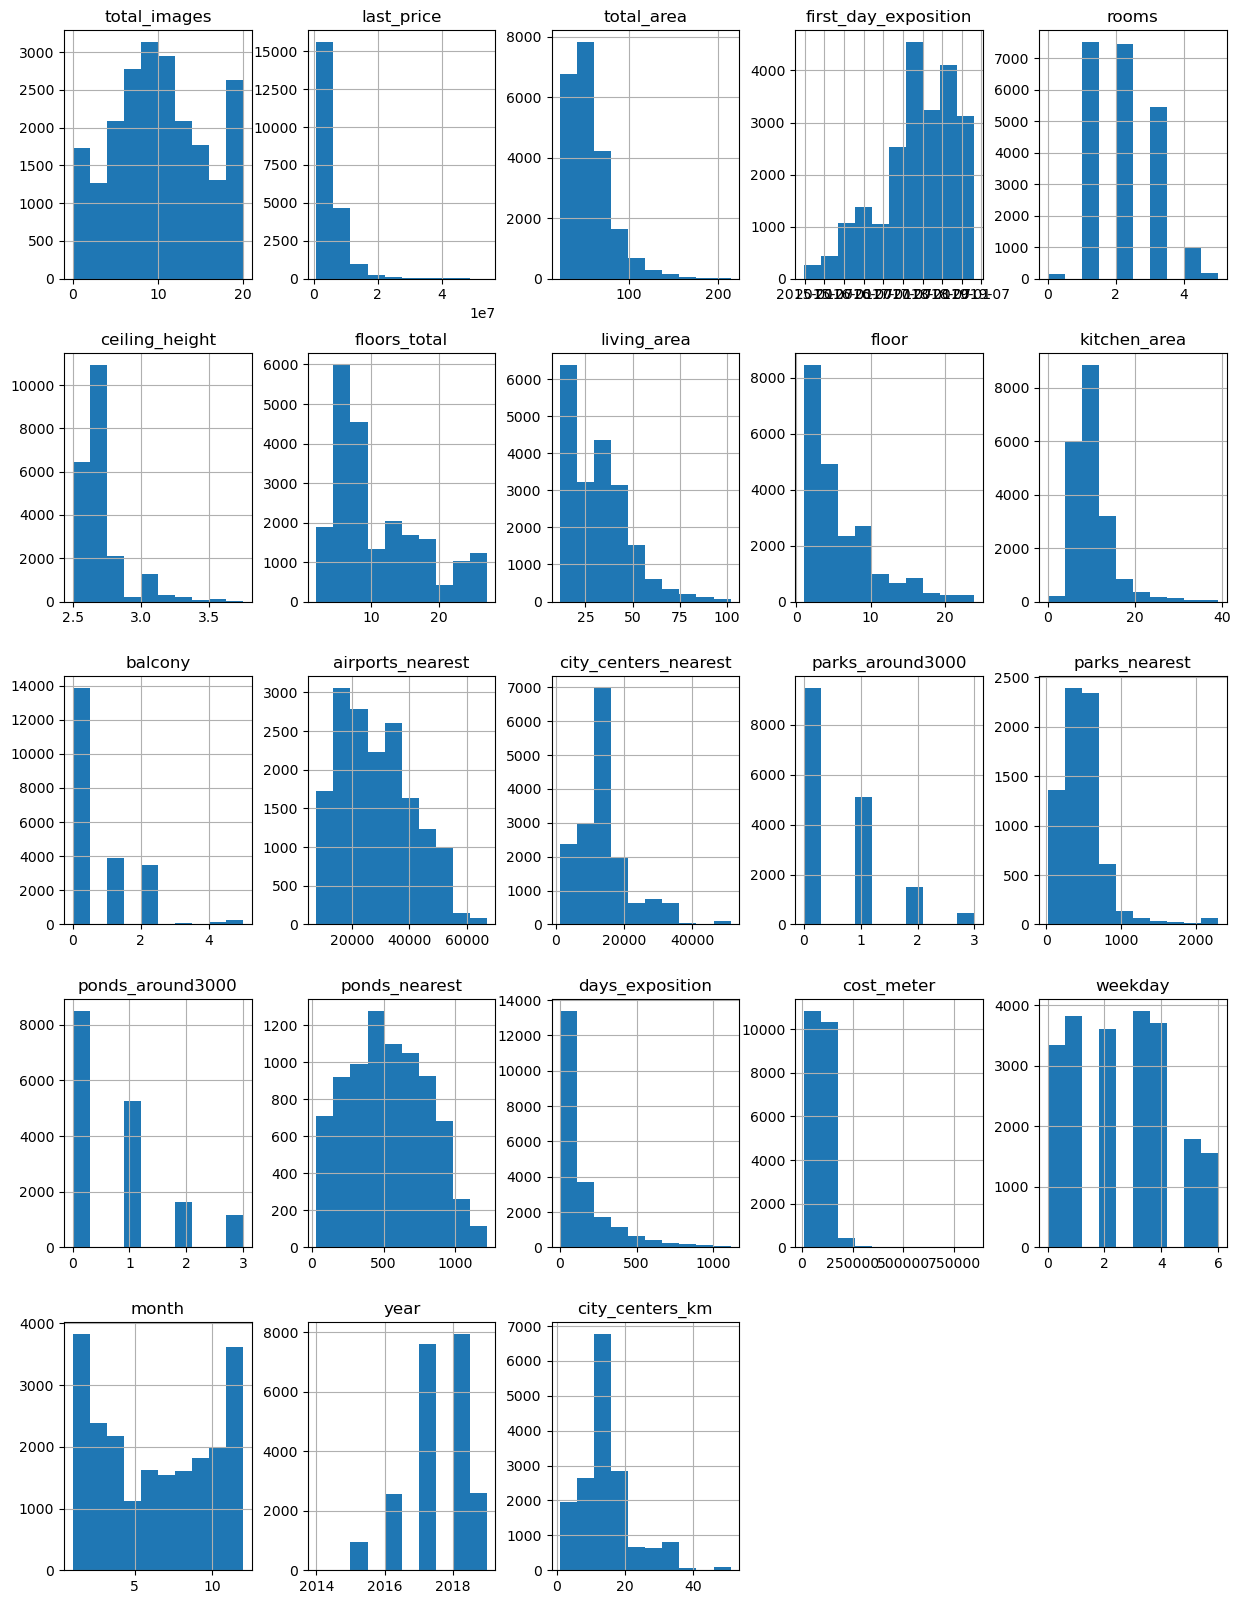

In [26]:
# гистограмма для каждого столбца
data.hist(figsize=(15, 20))

median: 95.0
mean: 158.974592653963


<Axes: >

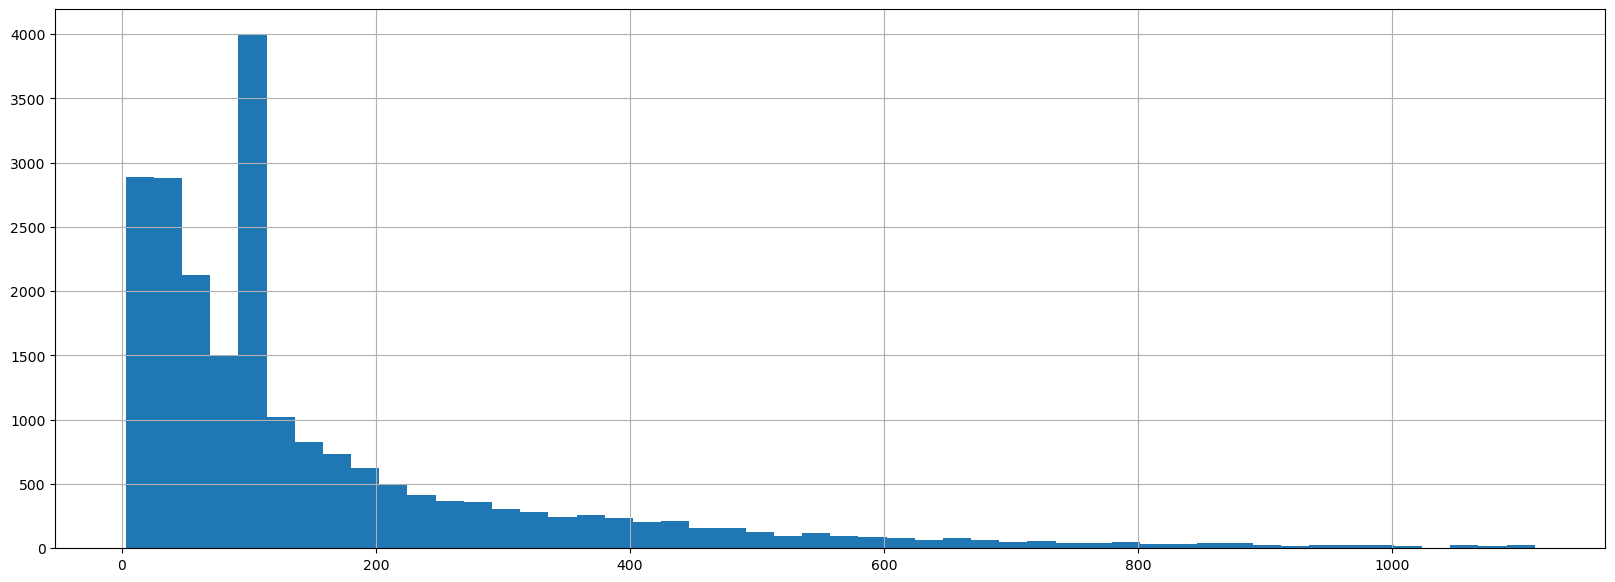

In [27]:
# определимся как быстро продавались квартиры

print(f"median: {data['days_exposition'].median()}\nmean: {data['days_exposition'].mean()}")
data['days_exposition'].hist(figsize=(20, 7), bins=50)

**Нормальным значением для скорости продажи является диапазон 45-190 дней.\
Значения вне этого диапазона являются быстрой/медленной продажей соответственно.\
Медианным значением является - 95 дней.**

### Поиск факторов, влияющих на цену

In [28]:
data.corrwith(data['last_price']).sort_values(ascending=False)

/var/folders/zm/rrw_79l15s3fch0mzwhb2fyr0000gn/T/ipykernel_50766/3097372204.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corrwith(data['last_price']).sort_values(ascending=False)


last_price              1.000000
total_area              0.747602
cost_meter              0.733564
living_area             0.627819
kitchen_area            0.556921
rooms                   0.436272
ceiling_height          0.391610
ponds_around3000        0.204136
parks_around3000        0.188533
total_images            0.137408
floors_total            0.087279
floor                   0.085170
days_exposition         0.069587
balcony                 0.045846
is_apartment            0.014178
parks_nearest           0.010359
month                  -0.003286
weekday                -0.008045
year                   -0.013591
airports_nearest       -0.014396
open_plan              -0.030875
studio                 -0.042797
ponds_nearest          -0.093211
city_centers_nearest   -0.334556
city_centers_km        -0.335319
dtype: float64

### Расчет средней стоимости квадратного метра в 10 популярных населенных пунктах

In [101]:
grouped_location = data.pivot_table(index='locality_name', values=['last_price', 'total_area'], aggfunc=('sum', 'count'))
# преобразим DataFrame
grouped_location.columns = ['count', 'total_price', 'delete', 'total_area']
del grouped_location['delete']

# найдем среднюю стоимость
grouped_location['mean_price_area'] = grouped_location['total_price']/grouped_location['total_area']

print(f"{grouped_location.sort_values('mean_price_area').tail(1)}\n\n{grouped_location.sort_values('mean_price_area').head(1)}\n\n")

grouped_location.sort_values('count', ascending=False).head(10)

                   count  total_price  total_area  mean_price_area
locality_name                                                     
поселок Лисий Нос      2      9655000        83.3    115906.362545

                         count  total_price  total_area  mean_price_area
locality_name                                                           
деревня Малая Романовка      1       850000        66.8     12724.550898




,count,total_price,total_area,mean_price_area
locality_name,,,,
Санкт-Петербург,14372,97374777411,856842.15,113643.776057
поселок Мурино,511,1892353159,22836.32,82865.941579
поселок Шушары,423,1751623999,23046.71,76003.212563
Всеволожск,385,1469453185,21718.10,67660.301085
Пушкин,340,2037158964,19646.90,103688.569902
Колпино,330,1276180246,17305.12,73745.818925
Гатчина,303,1053460360,15316.88,68777.738025
поселок Парголово,293,1310861459,15034.95,87187.616786
деревня Кудрово,288,1231412689,13564.45,90782.353063


city_centers_km
1.0     11244333
2.0     11224974
3.0      9336575
4.0     10043754
5.0     10752975
6.0     10761759
7.0     10902339
8.0      8700675
9.0      6550135
10.0     6275444
11.0     5948716
12.0     5780993
13.0     6023263
14.0     5509623
15.0     5671327
16.0     5308666
17.0     5084008
18.0     4809392
19.0     5016610
20.0     4657777
21.0     5416008
22.0     5328093
23.0     4705850
24.0     3854429
25.0     4121956
26.0     4285660
27.0     8300000
28.0     5026428
29.0     4236666
Name: last_price, dtype: int64

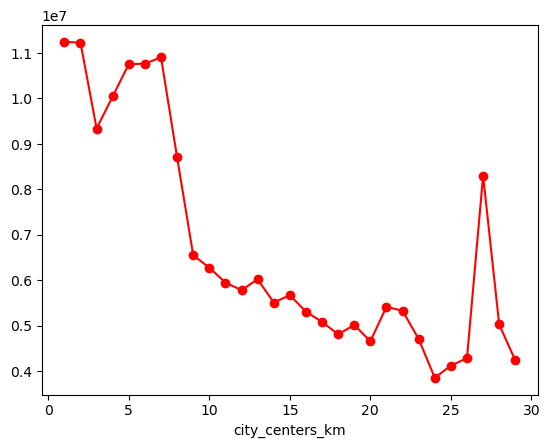

In [130]:
price_per_km = data.query('locality_name=="Санкт-Петербург"').groupby('city_centers_km')['last_price'].mean().astype(int)
price_per_km.plot(kind='line', marker='o', linestyle='-', color='r')

price_per_km

## Общий вывод

Большое количество пропусков картографических данных, а также данных,\
оставляемых пользователем. Большое количество сил и энергии ушло на предобработку.

Что касется выводов согласно ТЗ, то они есть в ячейках.\
Последние задания дались легко, но из-за дедлайнов сильно спешил.\
Отправлю первую итерацию проекта, пока не отчислили)

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод